# Classification of tasks per group

In [16]:
import pickle 
import pandas as pd 
import numpy as np 
from pathlib import Path 
from DMD import DMD

with open(str(Path.cwd().parent / 'results' / 'task_classification'/ 'force_other_features_cf.pkl'), 'rb') as handle:
    indiv_classi_force = pickle.load(handle) 

labels = ['Steady right', 'Sine right', 'Steady left', 'Sine left']

experts_force = np.mean([np.mean(indiv_classi_force[k], axis = 0) for k in indiv_classi_force if "e" in k],axis = 0)
conf_mat_experts_force = pd.DataFrame(experts_force, index = labels, columns = labels)
conf_mat_experts_force.index.name = 'Actual class'
conf_mat_experts_force.columns.name = 'Predicted class'

novices_force = np.mean([np.mean(indiv_classi_force[k], axis = 0) for k in indiv_classi_force if "n" in k],axis = 0)
conf_mat_novices_force = pd.DataFrame(novices_force, index = labels, columns = labels)
conf_mat_novices_force.index.name = 'Actual class'
conf_mat_novices_force.columns.name = 'Predicted class'


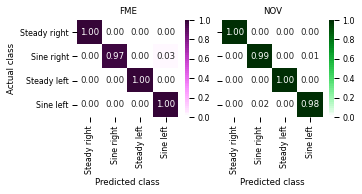

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt 
cm = 1/2.54
cmap_exp = sns.cubehelix_palette(n_colors = 50, start=0.4, rot=0, dark=0.1, gamma = 1, hue = 2, light=1)
cmap_nov = sns.cubehelix_palette(n_colors = 50, start=2.01, rot=0, dark=0.1, gamma = 1, hue = 2, light=1)
sns.set_context('paper', font_scale = .9)
fig, axes = plt.subplots(1,2, figsize = (13*cm, 7*cm))
sns.heatmap(conf_mat_experts_force, cmap= cmap_exp, annot=True, fmt='.2f', vmin = 0, vmax = 1, ax = axes[0])
sns.heatmap(conf_mat_novices_force, cmap= cmap_nov, annot=True, fmt='.2f', vmin = 0, vmax = 1, ax = axes[1])


axes[0].set_title('FME')
axes[1].set_title('NOV')
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_yticklabels([])
fig.tight_layout()
fig.savefig(str(Path.cwd().parent / 'Figures' / 'S1_task_classification_force_other_features.tiff'), dpi = 1000)